# "Exploring the Variance Retained: A Comparative Analysis of PCA on Multicollinear and Non-Multicollinear Datasets"

# Problem Statement

#### Compare the variance retained by PCA when applied to two different datasets: a multicollinear dataset (where features have strong correlations) and a non-multicollinear dataset (where features are uncorrelated). By comparing the variance retained, we can assess the effectiveness of PCA in capturing the underlying information in these different types of datasets.

In [15]:
import numpy as np
from sklearn.decomposition import PCA

# Multicollinear Dataset Generation
np.random.seed(0)
n_samples = 1000
n_features = 5

# Create a correlation matrix with strong positive correlation
correlation_matrix = np.array([[1.0, 0.9, 0.8, 0.7, 0.6],
                              [0.9, 1.0, 0.9, 0.8, 0.7],
                              [0.8, 0.9, 1.0, 0.9, 0.8],
                              [0.7, 0.8, 0.9, 1.0, 0.9],
                              [0.6, 0.7, 0.8, 0.9, 1.0]])

# Generate a random dataset based on the correlation matrix
multicollinear_data = np.random.multivariate_normal(np.zeros(n_features), correlation_matrix, size=n_samples)



In [7]:
# Perform PCA on multicollinear dataset
pca_multicollinear = PCA(n_components=2)
pca_multicollinear.fit(multicollinear_data)
variance_retained_multicollinear = np.sum(pca_multicollinear.explained_variance_ratio_)
variance_retained_multicollinear


0.9443182821172356

In [8]:
# Non-Multicollinear Dataset Generation
np.random.seed(0)
n_samples = 1000
n_features = 5

# Generate a random dataset with uncorrelated features
non_multicollinear_data = np.random.rand(n_samples, n_features)


In [9]:
# Perform PCA on non-multicollinear dataset
pca_non_multicollinear = PCA(n_components=2)
pca_non_multicollinear.fit(non_multicollinear_data)
variance_retained_non_multicollinear = np.sum(pca_non_multicollinear.explained_variance_ratio_)
variance_retained_non_multicollinear

0.42442064038015404

In [10]:
# Create a dictionary to store the variance retained for each dataset
variance_retained_dict = {
    "Multicollinear Dataset": variance_retained_multicollinear,
    "Non-Multicollinear Dataset": variance_retained_non_multicollinear
}

In [11]:
# Print the variance retained for two components for each dataset
for dataset, variance_retained in variance_retained_dict.items():
    print(f"{dataset}: Variance Retained for 2 Components = {variance_retained * 100:.2f}%")


Multicollinear Dataset: Variance Retained for 2 Components = 94.43%
Non-Multicollinear Dataset: Variance Retained for 2 Components = 42.44%


In [12]:
import matplotlib.pyplot as plt

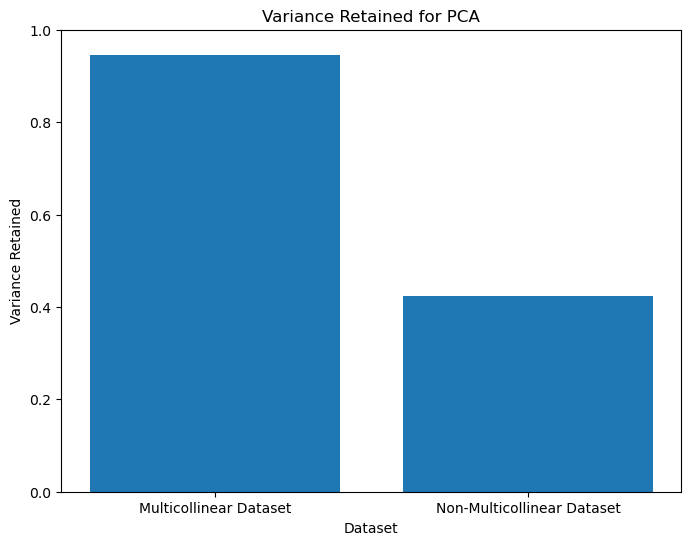

In [13]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.bar(variance_retained_dict.keys(), variance_retained_dict.values())
plt.title("Variance Retained for PCA")
plt.xlabel("Dataset")
plt.ylabel("Variance Retained")
plt.ylim(0, 1)
plt.show()

### Conclusion

Based on the results obtained, the multicollinear dataset retains a higher percentage of variance (94.43%) when reducing the dimensionality to two components using PCA. On the other hand, the non-multicollinear dataset retains a lower percentage of variance (42.44%) for the same number of components.

This suggests that the multicollinear dataset, which has strong positive correlations between its features, has more redundancy and shared information. PCA effectively captures and represents this shared information in a lower-dimensional space, resulting in a higher variance retention.

In contrast, the non-multicollinear dataset consists of uncorrelated features, indicating that there is less redundancy and shared information among the variables. Therefore, applying PCA to the non-multicollinear dataset may not be as effective in capturing meaningful patterns or reducing the dimensionality without losing a significant amount of variance.

The graphical representation, as shown in the bar plot, visually highlights the significant difference in variance retained between the two datasets. It provides a clear comparison, reinforcing the conclusion that PCA is more suitable for datasets with multicollinearity, where it can effectively reduce dimensionality while retaining a higher amount of variance.

Overall, these findings emphasize the importance of considering the nature of the dataset, particularly the presence or absence of multicollinearity, when deciding to apply PCA as a dimensionality reduction technique.